<a href="https://colab.research.google.com/github/ColstonBod-oy/forums-web-crawler/blob/main/Sample_Web_Crawler_using_Beautiful_Soup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sample Web Crawler**

**This is a sample code that implements the Beautiful Soup library through Google Colab to crawl and scrape data online and organize it into records.** Beautiful Soup was used for this demo over Scrapy due to its simpler implementation in Google Colab as its ease of integrated with other tools such as Panda and Numpy.

The code here is relatively short but it is important to understand the process thoroughly in order to be able to implement Beautiful Soup and similar tools for web crawling.

This Google Colab file goes over the general steps for web crawling with Beautiful Soup and elaborates on the process. **Make sure you click "File" > "Save a Copy in Drive" before making any modifications or running the code below.**



---



**Our first step is to import the needed libraries.** As you can see, we are importing four different libraries to be used for our web scraper.
1. The first is the **BeautifulSoup library** itself. This is used to provide access to the features that we will need to be able to crawl through content from the web.
2. The second library is the **Python requests module**, which will allow us to request HTML content from a specified webpage. This is what we will be using to specify what web pages we will be crawling through.
3. The third library is the **Pandas Python library**, which is an open source data analysis and data manipulation library. It is mainly used to organize and modify statistical data into a database. It can also be used for visualizing results in different graphs. For this sample, we will simply be using it to turn our data into a file we can access.
4. The fourth library is the **NumPy Python library** which provides an assortment of routines for fast operations on arrays and various derived objects such as the "numpy.NAN" value which is used in this sample.



In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

**The next step is to define the data that we would like to gather and from where.** We will be using the following Internet forums: [/x/ - Paranormal - 4chan](https://boards.4chan.org/x/), [All Topics - Questions on Blurtit](https://www.blurtit.com/topics), and [Darknetlive](https://darknetlive.com/) as the websites to Scrape.

These site communities are specifically picked to gather interesting posts. **We will be crawling and scraping pieces of information shown on each of the websites, specifically:**
1.   *Title of the posts*
2.   *Author of the posts*
3.   *Date of the posts*
4.   *Tags of the posts (for Darknetlive)*

These will be used as the basis of the logic of our application and what data we will be looking for each of the websites. **Take note that you must be specific when placing the URL for the site you will be scraping (i.e. website.com/index/page-1)**. We will be focusing on the posts section of the forums.

We will also create a fourth list, which will contain the webpages. **This will allow us to loop through each page and gather the posts listed there.**

In [2]:
fchan_subjects = []
fchan_names = []
fchan_datetimes = []
fchan_webpages = []
blurtit_titles = []
blurtit_authors = []
blurtit_dates = []
blurtit_webpages = []
darknet_headings = []
darknet_publish_dates = []
darknet_tags = []
darknet_webpages = []

# We use the range() function of Python to generate a loop based on a given set of integers.
# In 4chan's case, we will be scraping our data from 4 pages, but since it doesn't have a number at the end
# of its 1st page link, we have to first append it then create a range from 2-4, where the loop stops at 5.
fchan_webpages.append("https://boards.4chan.org/x/")

for i in range(2, 5):
  # Here, we append the page number to the URL to make it easier for us to go through each webpage that we are scraping.
  fchan_webpages.append("https://boards.4chan.org/x/%d" % (i))

# In Blurtit's case, we will be scraping our data from 2 pages, so the range is from 1-2, where the loop stops at 3.
for i in range(1, 3):
  blurtit_webpages.append("https://www.blurtit.com/topics?page=%d" % (i))

# In Darknet's case, we will be scraping our data from 5 pages, so the range is from 1-5, where the loop stops at 6.
for i in range(1, 6):
  darknet_webpages.append("https://darknetlive.com/?page=%d" % (i))

**This is the most important step in our web scraping process.** The bulk of our code is located here, which showcases the logic of the application as well as the target information that we need. What the code first does is extract the page details and then parse the HTML content.

# Inspect the source

**This is where we do web inspection.** To do this, we will be using inspect element as our primary tool. ***We have to go through the HTML code of our target website and pinpoint the hierarchy of HTML tags that point us to the information we want to extract (see screenshot below).*** Once we have gathered our needed HTML tags, we can then start extacting data.

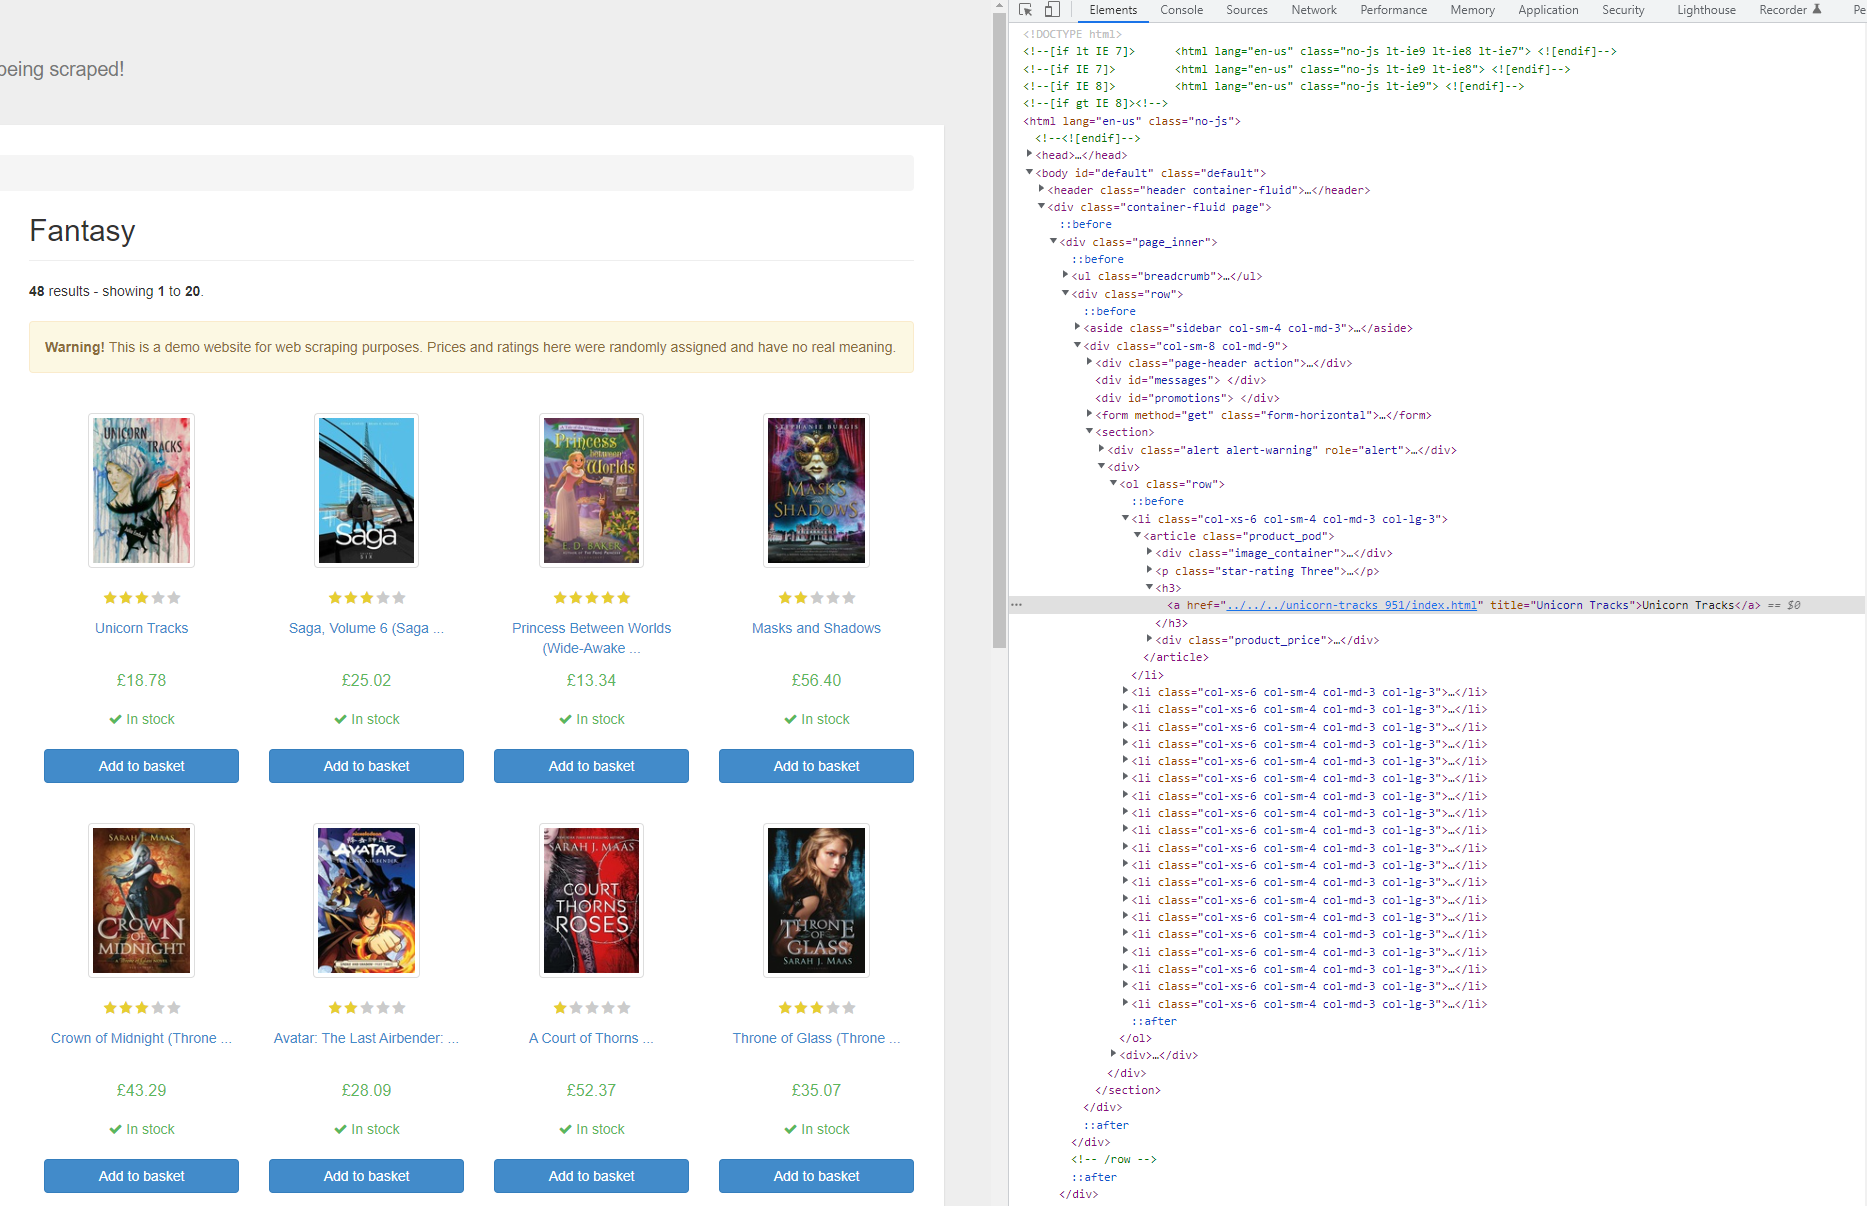

We then have our three sets of information listed as variables. We assign the key HTML classes or tags which will make it easier for us to pinpoint the content we are looking for. This will allow us to extract only the information needed from the website.

In [3]:
# The following loop goes through each of the pages of the target board in 4chan.
for pages in fchan_webpages:
  fchan_webpage = requests.get(pages)
  fchan_soup = BeautifulSoup(fchan_webpage.content, "html.parser")

  # This is the general tag that contains each of the key information we are trying to extract.
  fchan_post_container = fchan_soup.find_all(attrs={"class": "opContainer"})

  # The following loop goes through each of the posts in the post container.
  for post in fchan_post_container:
    # We need to get our information only from this tag for each of the posts to avoid duplicates in our data.
    # The "postInfoM mobile" tag was excluded because it contains the same data that were trying to extract.
    fchan_post_info_desktop = post.find("div", {"class": "postInfo desktop"})

    # These are the tags that contains the actual data that we want to extract.
    fchan_subject = fchan_post_info_desktop.find("span", {"class": "subject"})
    fchan_name = fchan_post_info_desktop.find("span", {"class": "name"})
    fchan_datetime = fchan_post_info_desktop.find("span", {"class": "dateTime"})

    # Once we have extracted all the appropriate tags, we add their texts to their respective lists.
    fchan_subjects.append(fchan_subject.get_text())
    fchan_names.append(fchan_name.get_text())
    fchan_datetimes.append(fchan_datetime.get_text())

# The following loop goes through each of the pages of the topics section in Blurtit.
for pages in blurtit_webpages:
  blurtit_webpage = requests.get(pages)
  blurtit_soup = BeautifulSoup(blurtit_webpage.content, "html.parser")

  blurtit_article_main = blurtit_soup.find_all(attrs={"class": "article-main"})

  for post in blurtit_article_main:
    # This is the tag that contains the author and date of the posts so we extract it.
    blurtit_post_meta = post.find("div", {"class": "meta"})

    # This is the tag that contains the title of the posts so we extract it.
    blurtit_title = post.find("div", {"class": "feed-item-title clearfix"})

    # For the title, we just need to add the text to our list.
    # For the last two, we will need to narrow down our HTML path further in order to get to the information that we are looking for.
    blurtit_titles.append(blurtit_title.get_text())
    blurtit_authors.append(blurtit_post_meta.strong.a.get_text())
    blurtit_dates.append(blurtit_post_meta.time.get_text())

# The following loop goes through each of the pages of Darknetlive.
for pages in darknet_webpages:
  darknet_webpage = requests.get(pages)
  darknet_soup = BeautifulSoup(darknet_webpage.content, "html.parser")

  darknet_post = darknet_soup.find_all(attrs={"class": "post"})

  for post in darknet_post:
    # This is the tag that contains the heading of the posts so we extract it.
    # Some of the tags that are used in this site don’t contain any class names.
    # Extracting them requires you to reference the actual tags themselves.
    darknet_heading = post.findAll("div")

    # This is the tag that contains the publish date and tags of the posts so we extract it.
    darknet_note = post.findAll("div", {"class": "note"})

    # To obtain the data, we need to access the appropriate child elements of the extracted tags by their index.
    # For the last one, we also need to trim down the excess space before adding the text to our list.
    darknet_headings.append(darknet_heading[1].h3.get_text())
    darknet_publish_dates.append(darknet_note[0].get_text())
    darknet_tags.append(darknet_note[2].get_text(strip=True).rstrip("&nbsp;"))


Something you will need to familiarize yourself with if you are doing web scraping is the **CSS selector** and **XPath (see screenshot below).** These are used to help us with identifying the heirarchy of our HTML tags. You can also use your browsers inspect element to help you identify the HTML and CSS paths of your target website. To do this, simply go to inspect element, right click the element you need to extract, and select copy. You might see an option to copy the CSS selector or XPath for that given element.

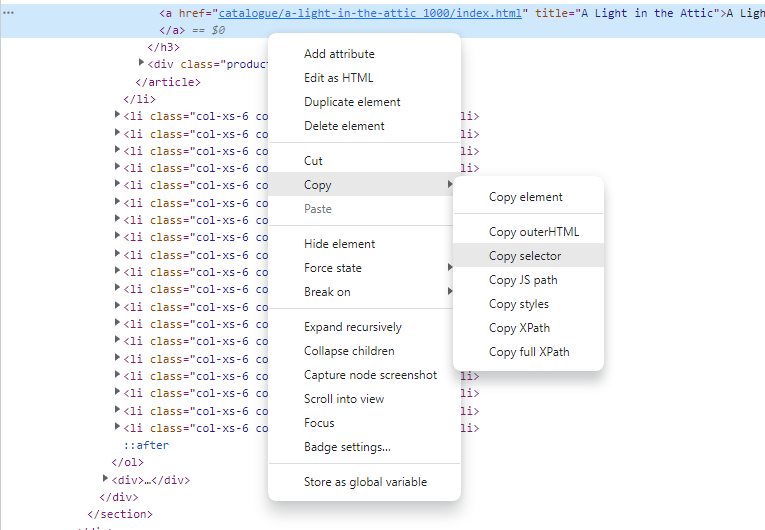

**The next step is to organize our data into dictionaries.** This will allow us to turn them into CSV files that we can download. Make sure that you place the correct variable names for the lists of data.

In [4]:
fchan_data = {"Subject": fchan_subjects, "OP Name": fchan_names, "Date & Time": fchan_datetimes}
blurtit_data = {"Title": blurtit_titles, "Author": blurtit_authors, "Date": blurtit_dates}
darknet_data = {"Heading": darknet_headings, "Publish Date": darknet_publish_dates, "Tag": darknet_tags}

**The next step is to turn the dictionaries into dataframes.** This is a feature of pandas and the reason why we imported it earlier. This essentially turns the dictionaries into tables. We then display the contents of the tables to make sure everything is displaying correctly and that we gathered the correct data.

In [5]:
# For each of the tables, we call the replace() function of Pandas to replace empty cells with the "numpy.NAN" value.
# After that, we call the dropna() function to drop the rows of the first column cells that have the "numpy.NAN" value.
# This avoids having rows that don't have any Subject/Title information available for a post.
# Finally, we call the reset_index() function to reset the indexes of the tables after dropping some of the rows.
fchan_df = pd.DataFrame.from_dict(fchan_data)
fchan_df.replace('', np.nan, inplace=True)
fchan_df.dropna(subset=['Subject'], inplace=True)
fchan_df.reset_index(drop=True, inplace=True)

blurtit_df = pd.DataFrame.from_dict(blurtit_data)
blurtit_df.replace('', np.nan, inplace=True)
blurtit_df.dropna(subset=['Title'], inplace=True)
blurtit_df.reset_index(drop=True, inplace=True)

darknet_df = pd.DataFrame.from_dict(darknet_data)
darknet_df.replace('', np.nan, inplace=True)
darknet_df.dropna(subset=['Heading'], inplace=True)
darknet_df.reset_index(drop=True, inplace=True)

display(fchan_df)
display(blurtit_df)
display(darknet_df)

,Subject,OP Name,Date & Time
0,X might as well be called /yt/,Anonymous,02/19/24(Mon)07:34:51
1,SOLAR OPPOSITES,Anonymous,02/19/24(Mon)07:18:04
2,Julian Assange,Anonymous,02/18/24(Sun)01:41:29
3,Meditation General,Anonymous,02/12/24(Mon)16:06:58
4,/tul/ - Tulpa General #48,Anonymous,02/14/24(Wed)07:56:52
5,Is he the anti christ,Anonymous,02/19/24(Mon)07:19:03
6,/LoA/ — Law of Assumption & Manifestation General,Anonymous,02/19/24(Mon)00:11:45
7,We are the gods,Anonymous,02/18/24(Sun)23:30:09
8,Star Trek,Anonymous,02/19/24(Mon)04:00:06
9,Talk about Magic/conspiracy hidden in plain sight,Anonymous,02/18/24(Sun)18:21:18


,Title,Author,Date
0,Why do QR Codes mean Seamless Transactions?,Anonymous,2/15/2024
1,Which Five NBA Players Have the Richest Contra...,Anonymous,2/15/2024
2,What 7 Mistakes should I try to avoid when tra...,Anonymous,2/15/2024
3,How can you blend Traditional Crafts with\nRem...,Anonymous,2/15/2024
4,Can low-income students study tuition-free?\n,Anonymous,2/7/2024
5,How Do I Navigate the Twists and Turns of an I...,Anonymous,1/30/2024
6,What are good Tips for Transporting Your Car t...,Anonymous,1/30/2024
7,Where do I find a Guide to Designing Custom Cy...,Anonymous,1/29/2024
8,How Localization Strategies Help Your Video Ga...,Anonymous,1/29/2024
9,How do you Prepare Students for the Future Job...,Anonymous,1/29/2024


,Heading,Publish Date,Tag
0,Monopoly Market Admin Sentenced,Published on 2024-02-16 using 317 words.,"Tagged:Darkweb-Market,Sentenced,admi"
1,"Dream Drugs Vendor ""CaliCartel"" Imprisoned",Published on 2024-02-14 using 564 words.,"Tagged:Darkweb-Vendor,Sentenced"
2,"Fentanyl Vendor ""Fent4U"" Sentenced to Prison",Published on 2024-02-13 using 252 words.,"Tagged:Bitcoin,Darkweb-Vendor,Sentenced"
3,Former Navy SEAL Sentenced for Producing Child...,Published on 2024-02-11 using 336 words.,"Tagged:Bitcoin,Child-Abuse,Sentenced"
4,Belarusian Man Charged for Role in BTC-e Opera...,Published on 2024-02-09 using 239 words.,"Tagged:Cryptocurrency,Indicted,Money-Laundering"
5,"Empire Market Opioids Vendor ""chlnsaint"" Impri...",Published on 2024-02-06 using 205 words.,"Tagged:Darkweb-Vendor,Opioids,Sentenced"
6,UK Duo Imprisoned for Importing Cannabis,Published on 2024-02-02 using 261 words.,"Tagged:Drugs,Sentenced"
7,Duo Charged for Selling Betting Accounts,Published on 2024-01-31 using 391 words.,"Tagged:Arrested,Fraud"
8,"International Drugs Vendor ""Liston"" Forfeits 8...",Published on 2024-01-27 using 437 words.,"Tagged:Darkweb-Vendor,Extradited,Forfeits,Plea..."
9,"Counterfeit Adderall Pills Vendor ""Adderall123...",Published on 2024-01-25 using 289 words.,"Tagged:Darkweb-Vendor,Sentenced"


**We now convert our tables into CSV files.** We turn our files into CSV documents which is then stored in the runtime of this Google Colab instance. You can change the file names to whatever name is appropriate for the data you are collecting.

In [6]:
# These are the names of the CSV files that will be downloaded.
FCHAN_DATA = "fchan_data.csv"
BLURTIT_DATA = "blurtit_data.csv"
DARKNET_DATA = "darknet_data.csv"
fchan_df.to_csv(FCHAN_DATA)
blurtit_df.to_csv(BLURTIT_DATA)
darknet_df.to_csv(DARKNET_DATA)

**The last step is to download the data.** We now have some organized CSV files containing the data that was scraped from our target websites. Good Job!

In [7]:
from google.colab import files
files.download(FCHAN_DATA)
files.download(BLURTIT_DATA)
files.download(DARKNET_DATA)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>